In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

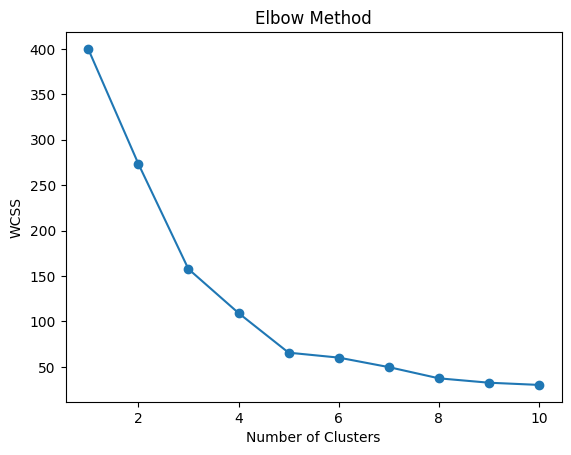

In [5]:
# Elbow Method (to find optimal K)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [6]:
# Apply K-Means clustring
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

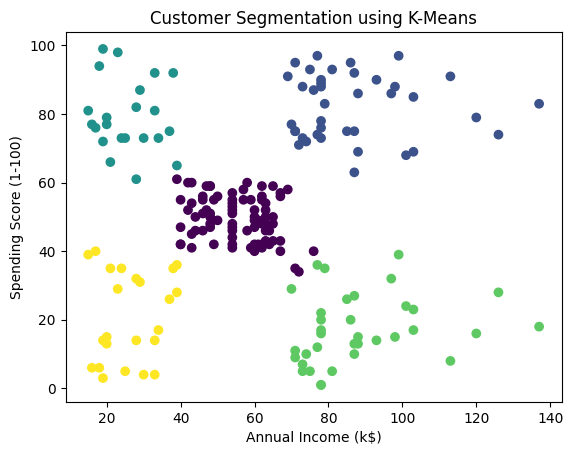

In [7]:
# Cluster Visualization
plt.figure()
plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster']
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.show()

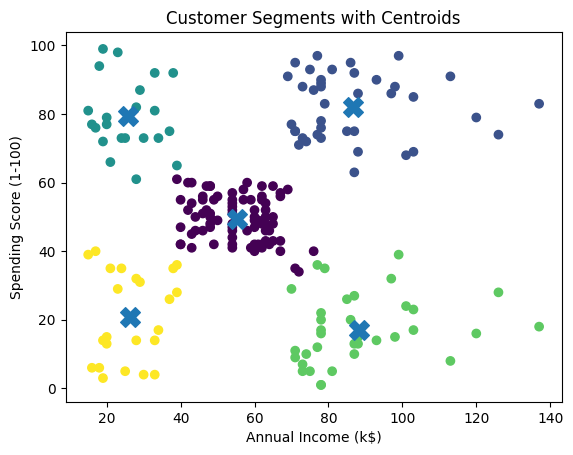

In [8]:
# Cluster Centers Visualization
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure()
plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster']
)
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker='X',
    s=200
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments with Centroids")
plt.show()